In [ ]:
!pip install matplotlib

In [39]:
## import packages and datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df1 = pd.read_csv('2020_population.csv')
df2 = pd.read_csv('2021_population.csv')
df3 = pd.read_csv('2022_population.csv')

In [40]:
##After merging the dataframes I found there is some missing information from df1
##exported the merged dataframe to an excel file, then using Excel's Conditional Formatting to find duplicates 
##discovered the missing data from df1 is: Democratic Republic of Congo, Republic of Congo, Saint Vincent and Grenadines and Isle Of Man
##added a 'continent' column manually through Excel (after merging)
##formatted the 'density' column in df1 to be like the other dataframes by removing certain text with Excel's "find and replace" feature
##

####################clean each dataframe by removing unneeded features#########################

##rename features
df1 = df1.rename(columns={'2020_population': 'population (2020)','rank': 'rank (2020)', 'density_sq_km': 'density (2020)','growth_rate': 'growth rate (2020)', 'world_%': 'world_% (2020)'})
df2 = df2.rename(columns={'2021_population': 'population (2021)','rank': 'rank (2021)', 'density_/sq_km': 'density (2021)','growth_rate': 'growth rate (2021)', 'world_%': 'world_% (2021)'})
df3 = df3.rename(columns={'2022_population': 'population (2022)','rank': 'rank (2022)', 'density_/sq_km': 'density (2022)','growth_rate': 'growth rate (2022)', 'world_%': 'world_% (2022)'})
df2 = df2.rename(columns={'country': 'country_2021'})
df3 = df3.rename(columns={'country': 'country_2022'})

In [41]:
##first sorting them by country to align all data across the three dataframes 
df1.sort_values('country', ascending=True, inplace=True)
df2.sort_values('country_2021', ascending=True, inplace=True)
df3.sort_values('country_2022', ascending=True, inplace=True)

##then removing unneeded features
df1 = df1.drop('iso_code', axis=1)
df1 = df1.drop('2021_last_updated', axis=1)

df2 = df2.drop('iso_code', axis=1)
df2 = df2.drop('2022_last_updated', axis=1)
df2 = df2.drop('area_sq_km', axis=1)
df2 = df2.drop('land_area_sq_km', axis=1)

df3 = df3.drop('iso_code', axis=1)
df3 = df3.drop('2023_last_updated', axis=1)
df3 = df3.drop('area_sq_km', axis=1)
df3 = df3.drop('land_area_sq_km', axis=1)

In [42]:
##merge dataframes
merged1 = df1.merge(df2, left_on='country', right_on='country_2021')
merged2 = merged1.merge(df3, left_on='country', right_on='country_2022')


In [43]:
##sorting columns lexicographically
merged2 = merged2.reindex(sorted(merged2.columns), axis=1)
df = merged2

##placing (country) column first
temp_cols=df.columns.tolist()
index=df.columns.get_loc("country")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
df=df[new_cols]

##drop irrelevant columns
df = df.drop('country_2021', axis=1)
df = df.drop('country_2022', axis=1)
df = df.drop('rank (2020)', axis=1)
df = df.drop('rank (2021)', axis=1)
df = df.drop('rank (2022)', axis=1)

## remove "%" sign from the growth rate and world share columns
df['growth rate (2020)'] = df['growth rate (2020)'].str.replace('%', '').astype(float)
df['growth rate (2021)'] = df['growth rate (2021)'].str.replace('%', '').astype(float)
df['growth rate (2022)'] = df['growth rate (2022)'].str.replace('%', '').astype(float)
df['world_% (2020)'] = pd.to_numeric(df['world_% (2020)'].str.replace('%', ''), errors='coerce')
df['world_% (2021)'] = pd.to_numeric(df['world_% (2021)'].str.replace('%', ''), errors='coerce')
df['world_% (2022)'] = pd.to_numeric(df['world_% (2022)'].str.replace('%', ''), errors='coerce')
df

,country,area,density (2020),density (2021),density (2022),growth rate (2020),growth rate (2021),growth rate (2022),population (2020),population (2021),population (2022),world_% (2020),world_% (2021),world_% (2022)
0,Afghanistan,"652,230 sq_km",61/sq_km,63,65,2.33,2.57,2.70,"38,928,346","40,099,462","41,128,771",0.51,0.52,0.53
1,Albania,"28,748 sq_km",100/sq_km,104,103,-0.17,-0.43,-0.35,"2,877,797","2,854,710","2,842,321",0.04,0.04,0.04
2,Algeria,"2,381,741 sq_km",19/sq_km,19,19,1.75,1.64,1.57,"43,851,044","44,177,969","44,903,225",0.57,0.56,0.57
3,American Samoa,199 sq_km,277/sq_km,221,220,-0.16,-1.69,-0.81,"55,191","45,035","44,273",0.00,0.00,0.00
4,Andorra,468 sq_km,165/sq_km,170,170,0.12,1.00,0.33,"77,265","79,034","79,824",0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Wallis And Futuna,142 sq_km,78/sq_km,42,42,-1.29,-0.47,-0.60,"11,239","11,627","11,572",0.00,0.00,0.00
224,Western Sahara,"266,000 sq_km",2/sq_km,2,2,2.43,1.84,1.96,"597,339","565,581","575,986",0.01,0.01,0.01
225,Yemen,"527,968 sq_km",58/sq_km,64,65,2.23,2.17,2.24,"29,825,964","32,981,641","33,696,614",0.39,0.42,0.43
226,Zambia,"752,612 sq_km",25/sq_km,27,28,2.92,2.80,2.76,"18,383,955","19,473,125","20,017,675",0.24,0.25,0.26


In [44]:
##saving dataframe to excel file to add missing information to it (the last 4 countries are missing data from dataframe df1)
df.to_excel("modified1.xlsx", index=False)

In [45]:
##load in the final cleans dataframe that I added a 'continent' column to
df = pd.read_excel('final.xlsx')
df

,country,area km sq,continent,density (2020),density (2021),density (2022),growth rate (2020),growth rate (2021),growth rate (2022),population (2020),population (2021),population (2022),world_% (2020),world_% (2021),world_% (2022)
0,Afghanistan,652230,Asia,61,63.0,65.0,2.33,2.57,2.70,38928346,40099462,41128771,0.51,0.52,0.53
1,Albania,28748,Europe,100,104.0,103.0,-0.17,-0.43,-0.35,2877797,2854710,2842321,0.04,0.04,0.04
2,Algeria,2381741,Africa,19,19.0,19.0,1.75,1.64,1.57,43851044,44177969,44903225,0.57,0.56,0.57
3,American Samoa,199,Oceania,277,221.0,220.0,-0.16,-1.69,-0.81,55191,45035,44273,0.00,0.00,0.00
4,Andorra,468,Europe,165,170.0,170.0,0.12,1.00,0.33,77265,79034,79824,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Wallis And Futuna,142,Oceania,78,42.0,42.0,-1.29,-0.47,-0.60,11239,11627,11572,0.00,0.00,0.00
224,Western Sahara,266000,Africa,2,2.0,2.0,2.43,1.84,1.96,597339,565581,575986,0.01,0.01,0.01
225,Yemen,527968,Asia,58,64.0,65.0,2.23,2.17,2.24,29825964,32981641,33696614,0.39,0.42,0.43
226,Zambia,752612,Africa,25,27.0,28.0,2.92,2.80,2.76,18383955,19473125,20017675,0.24,0.25,0.26


In [46]:
######### 
##The questions to ask:
#1- Which continent has the most/least population? (show piechart of world share for each continent)
#2- Which continent had the most/least population growth?
#3- Which continent has the most/least density?
#4- Which continent has the most/least landmass?
#5- Which continent has the most/least countries?
#6- Which countries have negative growth and what are their count in each continent?

In [47]:
######### 
##The questions to ask:
#1- Which continent has the most/least population? (show piechart of world share for each continent)
#2- Which continent had the most/least population growth?
#3- Which continent has the most/least density?
#4- Which continent has the most/least landmass?
#5- Which continent has the most/least countries?
#6- Which countries have negative growth and what are their count in each continent?

In [48]:
#format numbers with commas
def commas(number):
    return format(number, ',')
#numbers with 2 decimal places
def twodp(number):
    return round(number, 2)

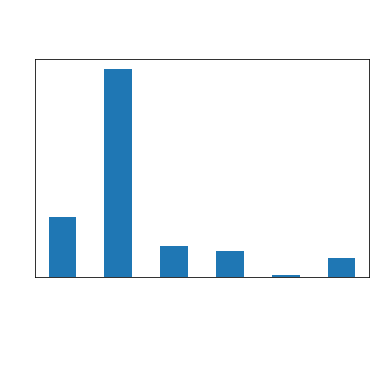

The continent with the highest population is Asia with a population of 4,701,442,811
The continent with the lowest population is Oceania with a population of 42,677,813


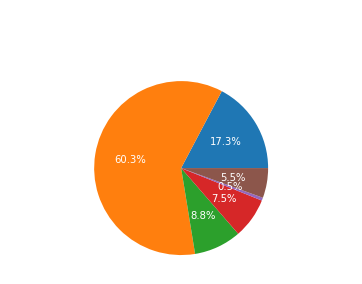

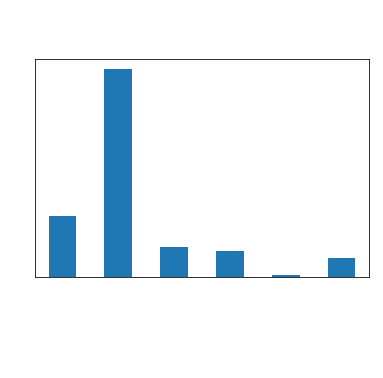

The continent with the highest population is Asia with a population of 4,753,659,326
The continent with the lowest population is Oceania with a population of 44,491,724


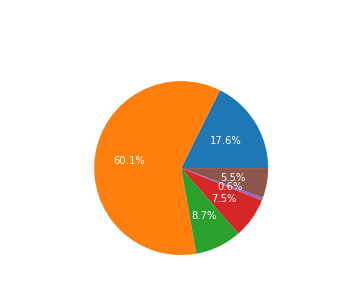

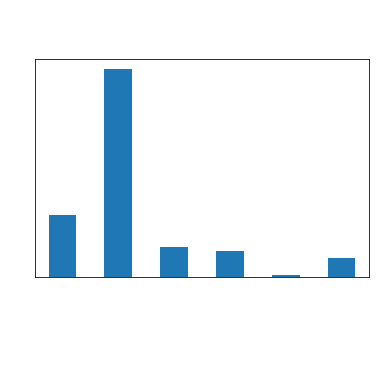

The continent with the highest population is Asia with a population of 4,780,755,347
The continent with the lowest population is Oceania with a population of 45,038,554


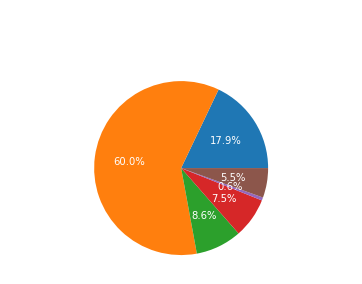

In [64]:
#Question 1: Which continent has the highest/least population

continent_populations = df.groupby('continent')['population (2020)'].sum()
max_continent = continent_populations.idxmax()
min_continent = continent_populations.idxmin()
continent_populations.plot(kind='bar')
plt.xlabel('Continent', color='white')
plt.ylabel('Population', color='white')
plt.title("Continent populations 2020\n", fontsize=25, color='white')
plt.tick_params(colors='white')
plt.show()

print(f"The continent with the highest population is {max_continent} with a population of {commas(continent_populations[max_continent])}")
print(f"The continent with the lowest population is {min_continent} with a population of {commas(continent_populations[min_continent])}")

continent_populations = df.groupby('continent').sum()
fig, ax = plt.subplots()
ax.pie(continent_populations['population (2020)'], labels=continent_populations.index, autopct='%1.1f%%', textprops={'color':'white'})
plt.title("Continent populations 2020\n", fontsize=25, color='white')
plt.show()

continent_populations = df.groupby('continent')['population (2021)'].sum()
max_continent = continent_populations.idxmax()
min_continent = continent_populations.idxmin()
continent_populations.plot(kind='bar')
plt.xlabel('Continent', color='white')
plt.ylabel('Population', color='white')
plt.title("Continent populations 2021\n", fontsize=25, color='white')
plt.tick_params(colors='white')
plt.show()

print(f"The continent with the highest population is {max_continent} with a population of {commas(continent_populations[max_continent])}")
print(f"The continent with the lowest population is {min_continent} with a population of {commas(continent_populations[min_continent])}")

continent_populations = df.groupby('continent').sum()
fig, ax = plt.subplots()
ax.pie(continent_populations['population (2021)'], labels=continent_populations.index, autopct='%1.1f%%', textprops={'color':'white'})
plt.title("Continent populations 2021\n", fontsize=25, color='white')
plt.show()

continent_populations = df.groupby('continent')['population (2022)'].sum()
max_continent = continent_populations.idxmax()
min_continent = continent_populations.idxmin()
continent_populations.plot(kind='bar')
plt.xlabel('Continent', color='white')
plt.ylabel('Population', color='white')
plt.title("Continent populations 2022\n", fontsize=25, color='white')
plt.tick_params(colors='white')
plt.show()

print(f"The continent with the highest population is {max_continent} with a population of {commas(continent_populations[max_continent])}")
print(f"The continent with the lowest population is {min_continent} with a population of {commas(continent_populations[min_continent])}")

continent_populations = df.groupby('continent').sum()
fig, ax = plt.subplots()
ax.pie(continent_populations['population (2022)'], labels=continent_populations.index, autopct='%1.1f%%', textprops={'color':'white'})
plt.title("Continent populations 2022\n", fontsize=25, color='white')
plt.show()

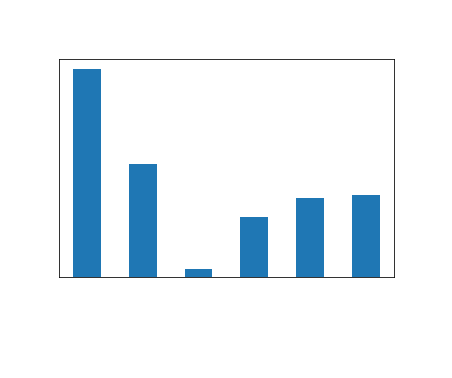

The continent with the highest average growth rate is Africa with a growth rate of 2.18%
The continent with the lowest average growth rate is Europe with a growth rate of 0.07%


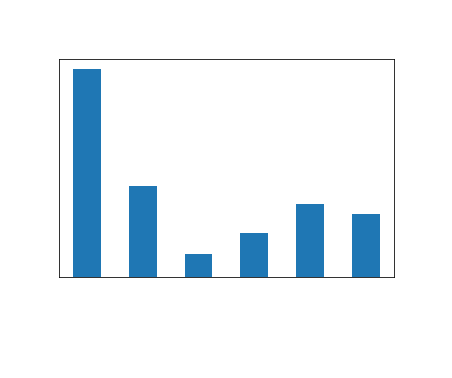

The continent with the highest average growth rate is Africa with a growth rate of 2.11%
The continent with the lowest average growth rate is Europe with a growth rate of 0.22%


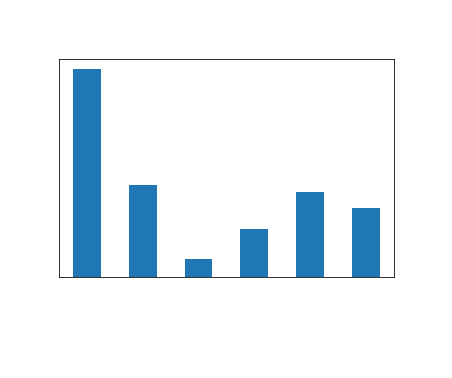

The continent with the highest average growth rate is Africa with a growth rate of 2.11%
The continent with the lowest average growth rate is Europe with a growth rate of 0.18%


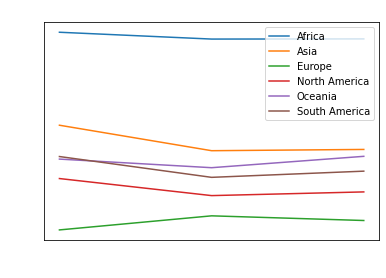

In [69]:
#Question 2: which continent had the most population growth?

continent_growth_rates = df.groupby('continent')['growth rate (2020)'].mean()
max_continent = continent_growth_rates.idxmax()
min_continent = continent_growth_rates.idxmin()
continent_growth_rates.plot(kind='bar')
plt.xlabel('Continent', color='white')
plt.ylabel('Average Growth Rate (%)', color='white')
plt.title("Growth Rates Per Continent (2020)\n", fontsize=25, color='white')
plt.tick_params(colors='white')
plt.show()
print(f"The continent with the highest average growth rate is {max_continent} with a growth rate of {twodp(continent_growth_rates[max_continent])}%")
print(f"The continent with the lowest average growth rate is {min_continent} with a growth rate of {twodp(continent_growth_rates[min_continent])}%")
continent_growth_rates = df.groupby('continent')['growth rate (2021)'].mean()
max_continent = continent_growth_rates.idxmax()
min_continent = continent_growth_rates.idxmin()
continent_growth_rates.plot(kind='bar')
plt.xlabel('Continent', color='white')
plt.ylabel('Average Growth Rate (%)', color='white')
plt.title("Growth Rates Per Continent (2021)\n", fontsize=25, color='white')
plt.tick_params(colors='white')
plt.show()
print(f"The continent with the highest average growth rate is {max_continent} with a growth rate of {twodp(continent_growth_rates[max_continent])}%")
print(f"The continent with the lowest average growth rate is {min_continent} with a growth rate of {twodp(continent_growth_rates[min_continent])}%")
continent_growth_rates = df.groupby('continent')['growth rate (2022)'].mean()
max_continent = continent_growth_rates.idxmax()
min_continent = continent_growth_rates.idxmin()
continent_growth_rates.plot(kind='bar')
plt.xlabel('Continent', color='white')
plt.ylabel('Average Growth Rate (%)', color='white')
plt.title("Growth Rates Per Continent (2022)\n", fontsize=25, color='white')
plt.tick_params(colors='white')
plt.show()
print(f"The continent with the highest average growth rate is {max_continent} with a growth rate of {twodp(continent_growth_rates[max_continent])}%")
print(f"The continent with the lowest average growth rate is {min_continent} with a growth rate of {twodp(continent_growth_rates[min_continent])}%")
continent_means = df.groupby('continent')[['growth rate (2020)', 'growth rate (2021)', 'growth rate (2022)']].mean()
years = ['2020', '2021', '2022']
for continent in continent_means.index:
    plt.plot(years, continent_means.loc[continent], label=continent)
plt.title('Mean Growth Rate by Continent', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Mean Growth Rate (%)', color='white')
plt.tick_params(colors='white')
plt.legend()
plt.show()

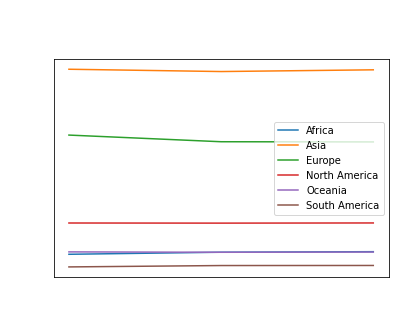

In [71]:
#Question 3 - Average density in each continent compared

continent_means = df.groupby('continent')[['density (2020)', 'density (2021)', 'density (2022)']].mean()
yearsx = ['2020', '2021', '2022']
for continent in continent_means.index:
    plt.plot(yearsx, continent_means.loc[continent].values, label=continent)
plt.title('Average density by Continent\n', fontsize=25, color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Mean Density (%)', color='white')
plt.tick_params(colors='white')

plt.legend()
plt.show()

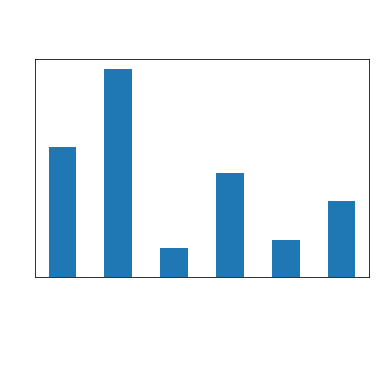

The continent with the highest landmass is Asia with an area of 48,452,821km²
The continent with the lowest landmass is Europe with an area of 6,695,537km²


In [72]:
##Question 4 - landmass

continent_landmass = df.groupby('continent')['area km sq'].sum()
max_continent = continent_landmass.idxmax()
min_continent = continent_landmass.idxmin()
continent_landmass.plot(kind='bar')
plt.xlabel('Continent',color='white')
plt.ylabel('Landmass',color='white')
plt.title("Continent Landmass\n", fontsize=25, color='white')
plt.tick_params(colors='white')

plt.show()
print(f"The continent with the highest landmass is {max_continent} with an area of {commas(continent_landmass[max_continent])}km\u00B2")
print(f"The continent with the lowest landmass is {min_continent} with an area of {commas(continent_landmass[min_continent])}km\u00B2")

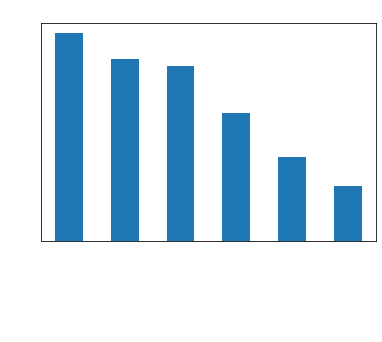

continent
Africa           57
Asia             50
Europe           48
North America    35
Oceania          23
South America    15
Name: country, dtype: int64


In [73]:
#5- which continent has the most/least countries?

counts = df.groupby('continent')['country'].count()
counts.plot(kind='bar')
plt.title('Number of countries by continent', color='white')
plt.xlabel('Continent', color='white')
plt.ylabel('Number of countries', color='white')
plt.tick_params(colors='white')

plt.show()
print(counts)

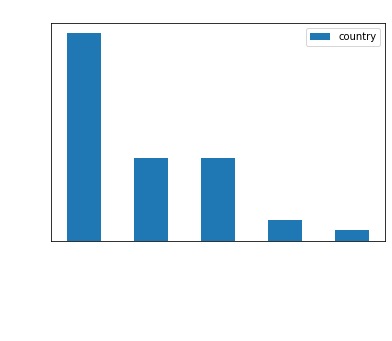

                         country  growth rate (2022)     continent
                         Ukraine               -7.45        Europe
                         Lebanon               -2.47          Asia
                        Bulgaria               -1.39        Europe
                       Lithuania               -1.15        Europe
                          Latvia               -1.10        Europe
                          Serbia               -1.00        Europe
                  American Samoa               -0.81       Oceania
    United States Virgin Islands               -0.72 North America
          Bosnia And Herzegovina               -0.70        Europe
               Wallis And Futuna               -0.60       Oceania
                         Croatia               -0.54        Europe
                        Maldives               -0.53          Asia
                           Japan               -0.53          Asia
                          Monaco               -0.47        Eu

In [76]:
#6- which countries have negative growth?

negative_growth_countries = df[df['growth rate (2022)'] < 0]

sorted_countries = negative_growth_countries.sort_values('growth rate (2022)')
count_by_continent = sorted_countries.groupby('continent').agg({'country': 'count'}).sort_values('country', ascending=False)
count_by_continent.plot(kind='bar')
plt.title('Number of countries with negative growth', color='white')
plt.xlabel('Continent', color='white')
plt.ylabel('Number of countries', color='white')
plt.tick_params(colors='white')
plt.show()

print(sorted_countries[['country', 'growth rate (2022)', 'continent']].to_string(index=False))
print()
print(count_by_continent.to_string())